# i. Perkenalan
>Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

Nama : Nailina Farah

Batch : FTDS_RMT_28

Dataset : credit_card_default (FROM bigquery-public-data.ml_datasets.credit_card_default)

Problem Statement : Model dikembangkan menggunakan algoritma terbaik yang dipilih melalui proses cross-validation antara Regresi Logistik, Support Vector Classifier (SVC), dan K-Nearest Neighbors (KNN) untuk memprediksi kemungkinan default pembayaran pada bulan berikutnya. Evaluasi model dilakukan dengan menggunakan metrik klasifikasi yaitu F1 score. Fokus utama adalah meningkatkan F1 Score karena metrik ini memberikan keseimbangan antara Presisi dan Recall. Dengan meningkatkan Skor F1, model akan lebih efektif dalam mengidentifikasi kedua kelas, baik yang positif maupun negatif, yang penting bagi lembaga keuangan untuk mengurangi risiko kredit dan meningkatkan kinerja prediktif dalam mengantisipasi default payment pada bulan berikutnya.

Objective: Project ini bertujuan untuk memprediksi kemungkinan default pembayaran bulan berikutnya bagi pemegang kartu kredit menggunakan data yang tersedia. Prediksi ini penting untuk membantu mengidentifikasi risiko kredit dan mengambil langkah-langkah pencegahan yang sesuai.

# ii Query SQL
>Tulis query yang telah dibuat untuk mengambil data dari Google Cloud Platform di bagian ini.

```sql
SELECT 
    limit_balance, 
    CAST(sex AS INT64) AS sex,
    CAST(education_level AS INT64) AS education_level,
    CAST(marital_status AS INT64) AS marital_status, 
    age, 
    pay_0, 
    pay_2, 
    pay_3, 
    pay_4, 
    CONCAT(CAST(pay_5 AS FLOAT64), '.0') AS pay_5, -- Menambahkan ".0" ke nilai pay_5
    CONCAT(CAST(pay_6 AS FLOAT64), '.0') AS pay_6, -- Menambahkan ".0" ke nilai pay_6
    bill_amt_1, 
    bill_amt_2, 
    bill_amt_3, 
    bill_amt_4, 
    bill_amt_5, 
    bill_amt_6, 
    pay_amt_1, 
    pay_amt_2, 
    pay_amt_3, 
    pay_amt_4, 
    pay_amt_5, 
    pay_amt_6, 
    CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM bigquery-public-data.ml_datasets.credit_card_default
LIMIT 56028; -- Limit No Batch (28) x Tahun Lahir (2001)
```

# iii. Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import phik
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score
from scipy.stats import uniform
import pickle
import json


# iv. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

## Informasi Data (Deskripsi Kolom)
`LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit

`SEX`: Gender (1=male, 2=female)

`EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

`MARRIAGE`: Marital status (1=married, 2=single, 3=others)

`AGE`: Age in years

`PAY_0`: Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 1=payment delay for one month, 0=the use of revolving credit, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

`PAY_2`: Repayment status in August, 2005 (scale same as above)

`PAY_3`: Repayment status in July, 2005 (scale same as above)

`PAY_4`: Repayment status in June, 2005 (scale same as above)

`PAY_5`: Repayment status in May, 2005 (scale same as above)

`PAY_6`: Repayment status in April, 2005 (scale same as above)

`BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)

`BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)

`BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)

`BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)

`BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)

`BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)

`PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)

`PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)

`PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)

`PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)

`PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)

`PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)

`default_payment_next`.month: Default payment (1=yes, 0=no)

Secara sederhana, default payment terjadi ketika seseorang atau perusahaan gagal melakukan pembayaran yang seharusnya dilakukan sesuai dengan perjanjian yang telah dibuat. Hal ini dapat terjadi dalam berbagai konteks, seperti pembayaran pinjaman rumah, kredit kendaraan, kartu kredit, atau jenis pinjaman lainnya. Dengan demikian, default payment adalah situasi yang dihindari dan merupakan indikator potensial bahwa seseorang atau perusahaan mengalami kesulitan keuangan atau tidak mampu memenuhi kewajiban pembayaran mereka.

In [2]:
# Load dataset
df_ori = pd.read_csv('P1G5_Set_1_nailina_farah.csv')

# Duplicate data ori
df = df_ori.copy()

In [3]:
# show 10 data teratas
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [4]:
# show 10 data terakhir
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [5]:
# Check Dataset 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Data tersebut memiliki:
- 2965 baris data
- 24 features
- 20 kolom bertipe float dan 4 kolom bertipe integer

In [6]:
# Check Dataset 2
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Dari hasil tidak ada kolom yang memiliki missing value

In [7]:
# Check Dataset 3
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Mendeskripsi data numerik sejumlah 24 kolom didapatkan nilai count, mean, std, min, 25%, 50%, 75%, dan max dengan rentang yang berbeda.

In [8]:
# Memilih hanya kolom-kolom numerik
numeric_data = df.select_dtypes(include=['int', 'float'])

# Menampilkan nilai skew untuk setiap kolom numerik
skewness = numeric_data.skew()

skewness

limit_balance                  1.000442
sex                           -0.441625
education_level                0.899875
marital_status                -0.020106
age                            0.772887
pay_0                          0.926790
pay_2                          0.861762
pay_3                          0.931460
pay_4                          1.101504
pay_5                          1.060173
pay_6                          0.978760
bill_amt_1                     2.484598
bill_amt_2                     2.458349
bill_amt_3                     2.569937
bill_amt_4                     2.448175
bill_amt_5                     2.400343
bill_amt_6                     2.432406
pay_amt_1                     11.877647
pay_amt_2                     29.404261
pay_amt_3                      8.044639
pay_amt_4                      8.451541
pay_amt_5                     11.468890
pay_amt_6                      9.760184
default_payment_next_month     1.394199
dtype: float64

Dari hasil didapatkan beberapa kolom dengan nilai skewness yang jauh dari 0, diantaranya:
- bill_amt_1
- bill_amt_2
- bill_amt_3
- bill_amt_4
- bill_amt_5
- bill_amt_6
- pay_amt_1
- pay_amt_2
- pay_amt_3
- pay_amt_4
- pay_amt_5
- pay_amt_6

# v. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Melihat distribusi dan outlier pada kolom tertentu

Karena pada perhitungan sebelumnya terdapat beberapa feature yang nilai skewness jauh dari 0, perlu dilihat bagaimana distribusinya dan sebaran outliernya

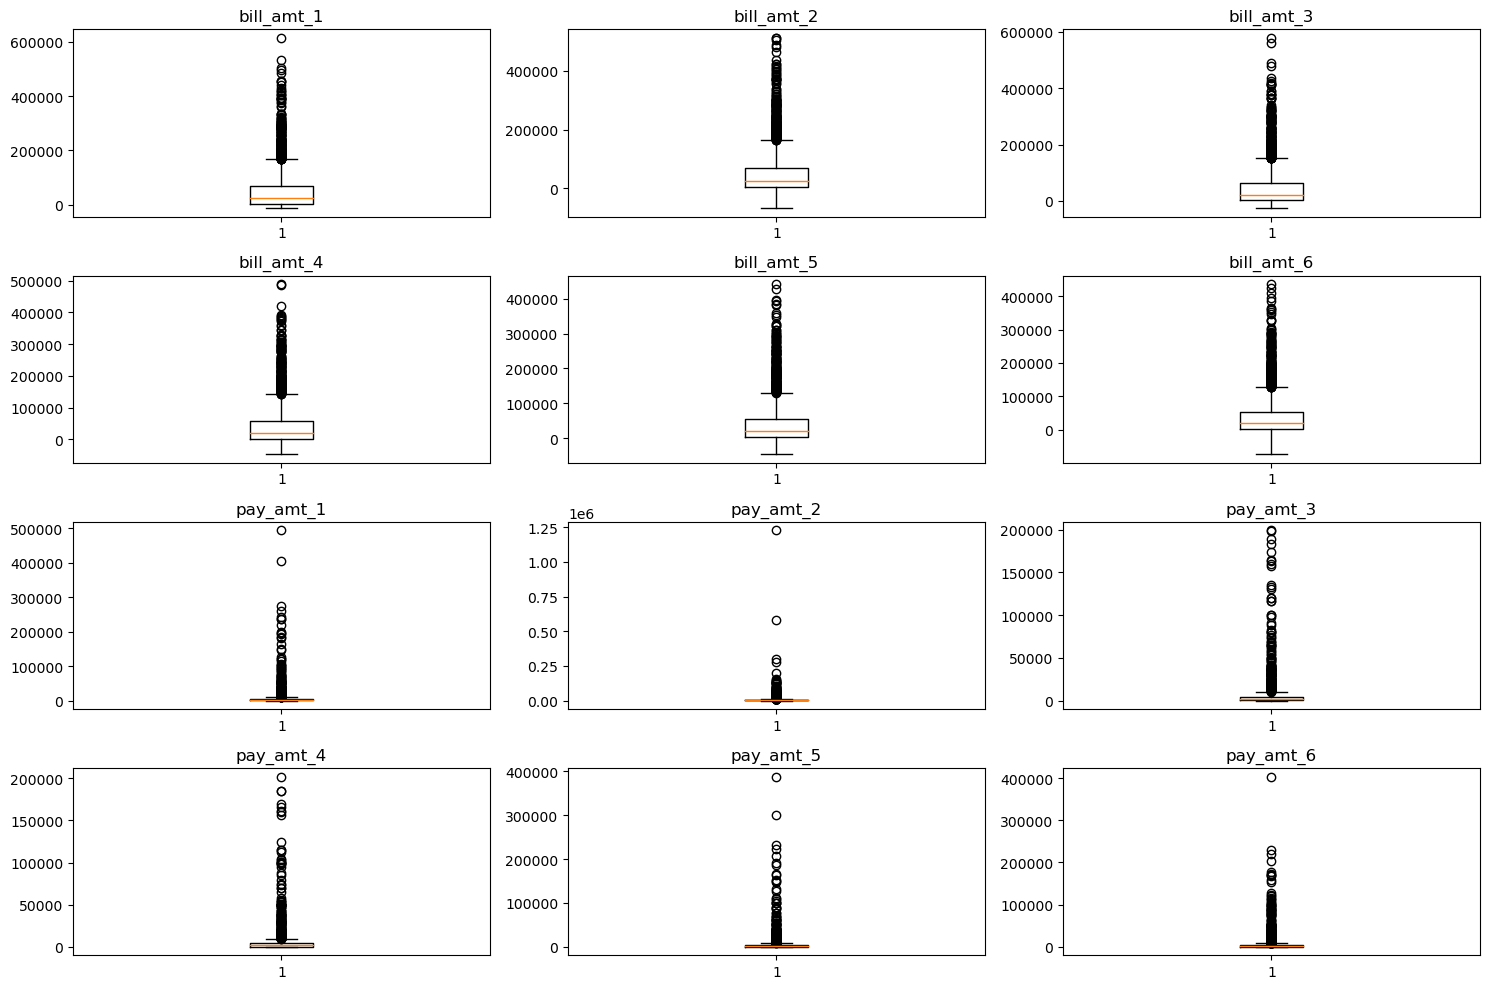

In [9]:
# visualisasi 1: melihat distribusi dari feature yang skew
kolom_outlier = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 
                 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

# Membuat boxplot untuk setiap kolom dengan outlier
plt.figure(figsize=(15, 10))
for i, kolom in enumerate(kolom_outlier):
    plt.subplot(4, 3, i+1)
    plt.boxplot(df[kolom])
    plt.title(kolom)
    plt.tight_layout()

plt.show()

Dari gambar terlihat bahwa memang cukup banyak outlier yang terdapat pada feature yang bernilai skew.

## Visualisai Distribusi Pembayaran Default Bulan Depan

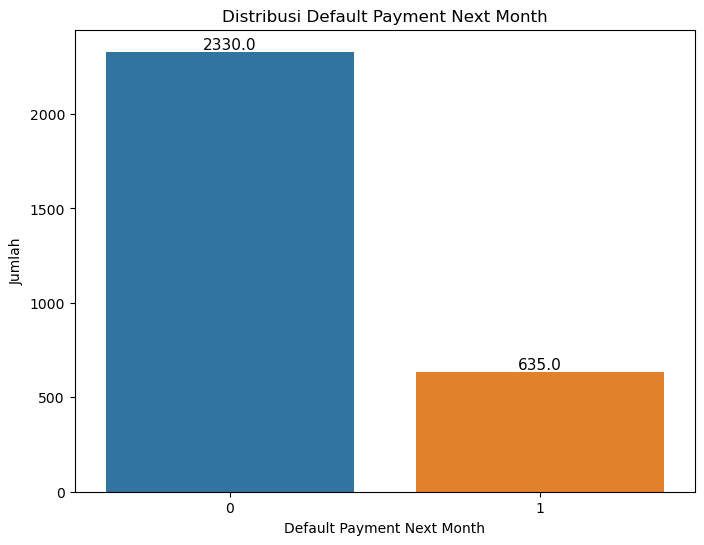

In [10]:
# Visualisasi 2: Distribusi Pembayaran Default Bulan Depan

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='default_payment_next_month')
plt.title('Distribusi Default Payment Next Month')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Jumlah')

# Menambahkan label nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

Visualisasi data tersebut memperlihatkan bahwa sebagian besar yaitu 2330 pelanggan tidak gagal melakukan pembayaran (tidak default payment), sedangkan sebagian lainnya yaitu 635 gagal melakukan pembayaran (default payment).

## Visualisai Distribusi Limit Balance

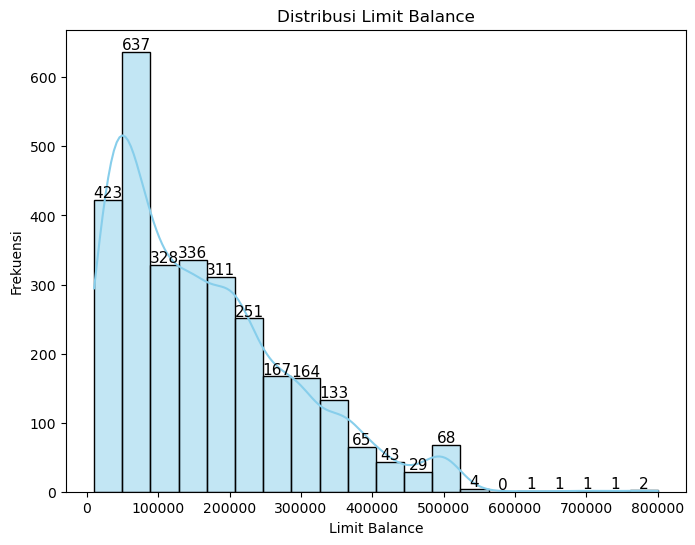

In [11]:
# Visualisasi 3: Distribusi Limit Balance

plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='limit_balance', bins=20, kde=True, color='skyblue')
plt.title('Distribusi Limit Balance')
plt.xlabel('Limit Balance')
plt.ylabel('Frekuensi')

# Menambahkan label nilai di atas setiap bin
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Visualisasi menunjukkan bahwa pelanggan yang memilki limit balance < 100000 cukup banyak yaitu 1060 pelanggan.

## Distribusi Umur

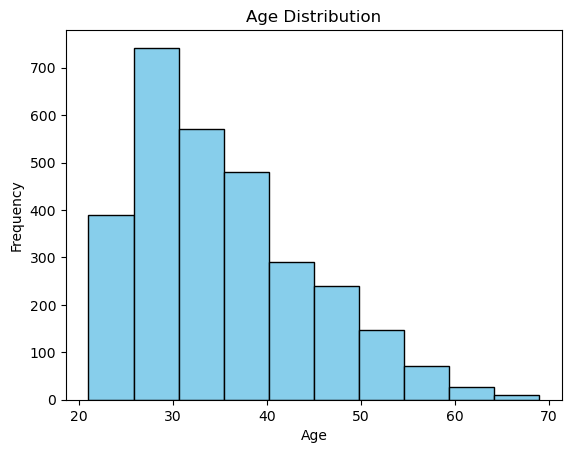

In [12]:
# Visualisasi 4: Distribusi Umur

plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Dari grafik terlihat bahwa sebagian pelanggan cukup banyak di rentang umur 20 -40 tahun. Kemudian dari 40 tahun keatas semakin bertambah usia, maka semakin berkurang frekuensinya.

## Distribusi tingkat pendidikan berdasarkan default_payment_next_month = 1

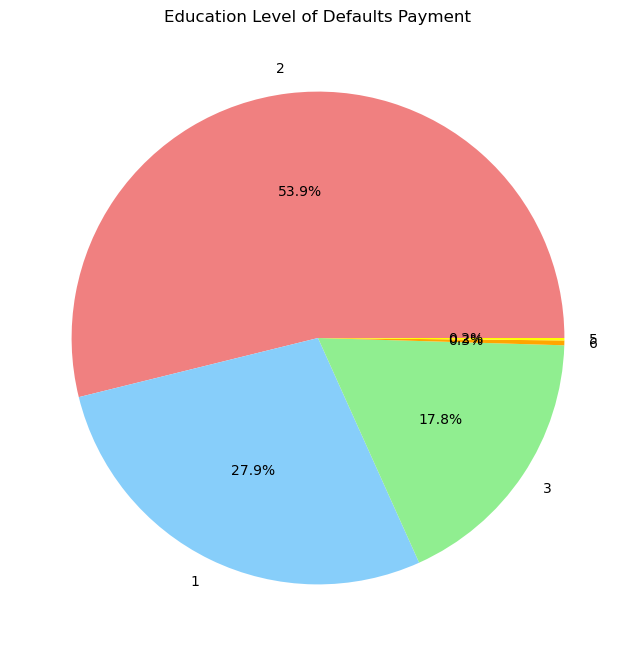

In [13]:
# Visualisai 5: Distribusi tingkat pendidikan berdasarkan default_payment_next_month

# Filter data di mana default_payment_next_month adalah 1 (Yes)
default_df = df[df['default_payment_next_month'] == 1]

# Hitung jumlah default payment untuk setiap tingkat pendidikan
edu_default_counts = default_df['education_level'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(edu_default_counts, labels=edu_default_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'yellow'])
plt.title('Education Level of Defaults Payment')
plt.show()

Pie chart tersebut menunjukkan bahwa sebagaian besar pelanggan yang default payment adalah pelanggan dengan tingkat pendidikan university yaitu sebesar 53,9%. 

## Default Payment berdasarkan Status Pernikahan

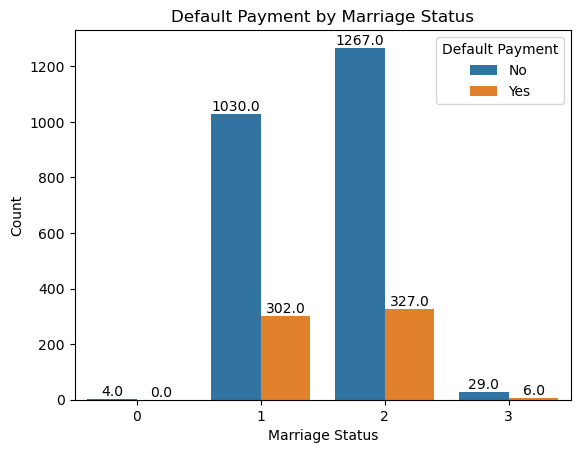

In [14]:
# Visualisasi 6: Default Payment berdasarkan Status Pernikahan
# Membuat bar plot
sns.countplot(x='marital_status', hue='default_payment_next_month', data=df)

# Menambahkan label
plt.xlabel('Marriage Status')
plt.ylabel('Count')
plt.title('Default Payment by Marriage Status')
plt.legend(title='Default Payment', labels=['No', 'Yes']) # menambahkan legenda

# Menambahkan nilai di setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, height, ha='center', va='bottom')

plt.show()

Bar plot menunjukkan bahwa kecenderungan pelanggan yang single lebih banyak yang tidak mengalami default payment yaitu 1267 orang, kemungkinan karena pengeluaran yang belum teralalu besar. Dari grafik ini juga terlihat terdapat nilai 0 yang tidak masuk kategori marital_status sehingga dianggap missing value.

## Default Payment berdasarkan Status gender

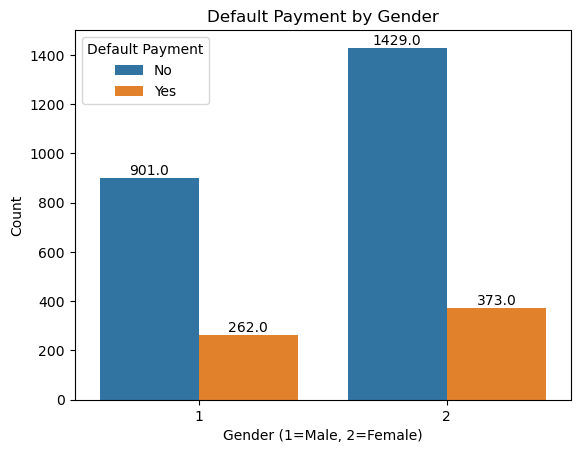

In [15]:
# Visualisasi 7: Default Payment berdasarkan gender
# Membuat bar plot
sns.countplot(x='sex', hue='default_payment_next_month', data=df)

# Menambahkan label
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Count')
plt.title('Default Payment by Gender')
plt.legend(title='Default Payment', labels=['No', 'Yes']) # menambahkan legenda

# Menambahkan nilai di setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, height, ha='center', va='bottom')

plt.show()

Di antara perempuan dan laki-laki, frekuensi default payment maupun tidak default payment lebih banyak pada perempuan. Pada perempuan, default payment berjumlah 373 sedangkan pada laki-laki hanya 262. Kemudian frekuensi tidak default payment pada perempuan sebesar 1429, sedangkan pada laki-laki 901.

## Umur vs Limit Balance

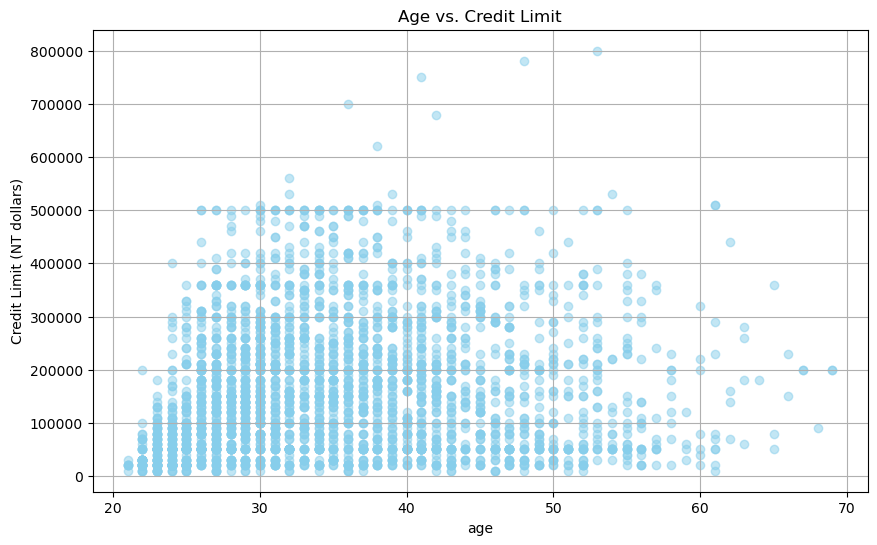

In [16]:
# Visualisasi 8: Umur vs Limit Balance
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['limit_balance'], color='skyblue', alpha=0.5)
plt.xlabel('age')
plt.ylabel('Credit Limit (NT dollars)')
plt.title('Age vs. Credit Limit')
plt.grid(True)
plt.show()

Dari scatterplot tersebut, terlihat bahwa credit limit tertinggi berada pada rentang umur sekitar 50-60 tahun. Kemudian pada rentang umur tertinggi yaitu 60-70 tahun, credit limit berkisar dibawah 300000.

# vi. Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Mengambil data inference dari data asli

In [17]:
# menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = df.sample(1, random_state=0)

# menghapus data inference dari df
df.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# menghapus target di data_inf
data_inf.drop(['default_payment_next_month'], axis=1, inplace=True)

# menyimpan data_inf
data_inf.to_csv('data_inf.csv',index=False)

## Cek Duplikasi

In [18]:
# cek duplikasi sebelum drop duplikasi
df.duplicated().sum()

1

In [19]:
# define dataframe untuk menghapus duplikasi
df = df.drop_duplicates()

In [20]:
# cek setelah drop duplikasi
df.duplicated().sum()

0

Terdapat 1 data duplikat sehingga harus didrop dan dicek kembali.

## Split Features (X) dan target (y)

In [21]:
# Define features (X) dan target(Y) dimana X adalah features selain price, karena price menjadi target.

X = df.drop('default_payment_next_month', axis = 1)
y = df['default_payment_next_month']
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0
2960,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0
2961,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2962,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0


Features (X) terdiri dari 23 kolom.

## Split Train and Test set

In [22]:
# melihat shape dari features
X.shape

(2963, 23)

In [23]:
# split data train dan data test dengan 80% train set dan 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27,random_state = 10)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
X_train

Train Size : (2162, 23)
Test Size : (801, 23)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2930,20000.0,1,2,1,37.0,0.0,0.0,-1.0,-1.0,-2.0,...,19400.0,0.0,0.0,17666.0,2000.0,19400.0,0.0,0.0,17666.0,0.0
778,210000.0,2,2,1,33.0,0.0,0.0,0.0,0.0,0.0,...,8792.0,9189.0,4404.0,5708.0,1500.0,1500.0,1000.0,500.0,2000.0,546.0
2072,200000.0,2,2,1,39.0,1.0,-1.0,0.0,0.0,-1.0,...,62433.0,-82.0,16550.0,5239.0,21801.0,42745.0,0.0,16632.0,5265.0,0.0
2845,30000.0,1,2,2,24.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428,80000.0,1,2,1,61.0,0.0,0.0,0.0,0.0,0.0,...,73855.0,41003.0,29690.0,27596.0,5500.0,10000.0,7003.0,4700.0,3600.0,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,20000.0,1,3,1,36.0,8.0,7.0,6.0,5.0,4.0,...,23214.0,22583.0,21662.0,21031.0,0.0,0.0,0.0,0.0,0.0,0.0
1180,50000.0,2,3,1,57.0,0.0,0.0,0.0,0.0,0.0,...,50820.0,50706.0,30636.0,30501.0,2100.0,2500.0,3820.0,1636.0,1501.0,1700.0
1344,80000.0,2,1,2,24.0,0.0,0.0,2.0,0.0,0.0,...,43576.0,28468.0,25971.0,23686.0,9425.0,1.0,2012.0,1091.0,1006.0,2516.0
527,150000.0,1,2,2,49.0,0.0,0.0,0.0,0.0,0.0,...,75782.0,76333.0,77956.0,77553.0,2985.0,2700.0,5000.0,2823.0,2865.0,2679.0


Dengan pembagian 73% untuk train didapatkan data sebanyak 2162 baris dan 27% untuk test didapatkan data sebanyak 801 baris.

## Handling Missing Value

In [24]:
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [25]:
X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [26]:
y_train.isnull().sum()

0

In [27]:
y_test.isnull().sum()

0

Meskipun nilai di hasil tertera 0, namun dalam dataset disebutkan bahwa value 5 dan 6 dalam feature "education_level" tertera unknown sehingga harus dihandling. Kemudian saya juga akan cek value 0 di feature lainnya.

In [28]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom education_level
education_counts = df['education_level'].value_counts()

# Menghitung total jumlah data
total_data = len(df)

# Menghitung persentase nilai "5" dan "6"
percentage_5 = (education_counts.get(5, 0) / total_data) * 100
percentage_6 = (education_counts.get(6, 0) / total_data) * 100

print(f"Persentase nilai '5' di kolom education_level: {percentage_5:.2f}%")
print(f"Persentase nilai '6' di kolom education_level: {percentage_6:.2f}%")

Persentase nilai '5' di kolom education_level: 0.81%
Persentase nilai '6' di kolom education_level: 0.13%


In [29]:
# Menghitung jumlah nilai 0 di setiap kolom kategorik
count_sex_0 = (df['sex'] == 0).sum()
count_education_0 = (df['education_level'] == 0).sum()
count_marital_0 = (df['marital_status'] == 0).sum()

print(f"Jumlah nilai 0 di kolom 'sex': {count_sex_0}")
print(f"Jumlah nilai 0 di kolom 'education_level': {count_education_0}")
print(f"Jumlah nilai 0 di kolom 'marital_status': {count_marital_0}")


Jumlah nilai 0 di kolom 'sex': 0
Jumlah nilai 0 di kolom 'education_level': 2
Jumlah nilai 0 di kolom 'marital_status': 4


Dikarenakan persentase <5% serta jumlah nilai 0 di kolom lainnya sedikit, saya akan melakukan trim untuk menghandling missing value tersebut.

In [30]:
# Dapatkan indeks yang perlu dihapus dari X_train dan X_test
indices_to_drop_train = X_train[(X_train['education_level'].isin([0, 5, 6])) | (X_train['sex'] == 0) | (X_train['marital_status'] == 0)].index
indices_to_drop_test = X_test[(X_test['education_level'].isin([0, 5, 6])) | (X_test['sex'] == 0) | (X_test['marital_status'] == 0)].index

# Drop baris dari X_train, X_test, y_train, dan y_test dengan indeks yang sesuai
X_train = X_train.drop(indices_to_drop_train)
y_train = y_train.drop(indices_to_drop_train)

X_test = X_test.drop(indices_to_drop_test)
y_test = y_test.drop(indices_to_drop_test)

In [31]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom education_level di X_train
education_counts = X_train['education_level'].value_counts()

# Menghitung total jumlah data
total_data = len(X_train)

# Menghitung persentase nilai "5" dan "6"
percentage_5 = (education_counts.get(5, 0) / total_data) * 100
percentage_6 = (education_counts.get(6, 0) / total_data) * 100

# Menghitung jumlah nilai 0 di setiap kolom pada X_train
count_sex_0 = (X_train['sex'] == 0).sum()
count_education_0 = (X_train['education_level'] == 0).sum()
count_marital_0 = (X_train['marital_status'] == 0).sum()

# Menghitung jumlah nilai 0 di setiap kolom pada X_test
count_sex_0_test = (X_test['sex'] == 0).sum()
count_education_0_test = (X_test['education_level'] == 0).sum()
count_marital_0_test = (X_test['marital_status'] == 0).sum()

# print nilai
print(f"Persentase nilai '5' di kolom education_level: {percentage_5:.2f}%")
print(f"Persentase nilai '6' di kolom education_level: {percentage_6:.2f}%")
print(f"Jumlah nilai 0 di kolom 'sex' pada X_train: {count_sex_0}")
print(f"Jumlah nilai 0 di kolom 'education_level' pada X_train: {count_education_0}")
print(f"Jumlah nilai 0 di kolom 'marital_status'pada X_train: {count_marital_0}")
print(f"Jumlah nilai 0 di kolom 'sex' pada X_test: {count_sex_0_test}")
print(f"Jumlah nilai 0 di kolom 'education_level' pada X_test: {count_education_0_test}")
print(f"Jumlah nilai 0 di kolom 'marital_status'pada X_test: {count_marital_0_test}")

Persentase nilai '5' di kolom education_level: 0.00%
Persentase nilai '6' di kolom education_level: 0.00%
Jumlah nilai 0 di kolom 'sex' pada X_train: 0
Jumlah nilai 0 di kolom 'education_level' pada X_train: 0
Jumlah nilai 0 di kolom 'marital_status'pada X_train: 0
Jumlah nilai 0 di kolom 'sex' pada X_test: 0
Jumlah nilai 0 di kolom 'education_level' pada X_test: 0
Jumlah nilai 0 di kolom 'marital_status'pada X_test: 0


Dapat terlihat bahwa missing value sudah tidak ada.

In [32]:
# cek shape setelah handling missing value
print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)

X Train Size : (2135, 23)
X Test Size : (794, 23)
y Train Size : (2135,)
y Test Size : (794,)


Setelah dicek kembali, shape tetap sesuai antara train dan test.

## Handling Outlier

In [33]:
# Memilih hanya kolom-kolom numerik
numeric_data = X_train.select_dtypes(include=['int', 'float'])

# Menampilkan nilai skew untuk setiap kolom numerik
skewness = numeric_data.skew()

skewness

limit_balance       0.980723
sex                -0.450661
education_level     0.339708
marital_status     -0.005298
age                 0.815496
pay_0               1.130347
pay_2               0.993783
pay_3               0.994746
pay_4               1.204896
pay_5               1.175204
pay_6               1.089134
bill_amt_1          2.457122
bill_amt_2          2.471594
bill_amt_3          2.651459
bill_amt_4          2.476710
bill_amt_5          2.400136
bill_amt_6          2.434564
pay_amt_1          11.739866
pay_amt_2          29.532932
pay_amt_3           8.152497
pay_amt_4           8.879563
pay_amt_5          12.536032
pay_amt_6           7.285557
dtype: float64

Dari hasil tersebut cenderung semua memiliki skewness sehingga akan didetect dengan tukey's rule dan dicapping dengan median pada kolom numerik karena tidak berdistribusi normal.

In [34]:
# Fungsi untuk mengganti nilai outlier dengan median
def replace_outliers_with_median(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = np.median(data)
    data = np.where((data < lower_bound) | (data > upper_bound), median, data)
    return data

# Loop melalui kolom-kolom yang perlu dicapping dengan median
columns_to_cap_with_median = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                              'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
for col in columns_to_cap_with_median:
    X_train[col] = replace_outliers_with_median(X_train[col])

# Tampilkan DataFrame X_train setelah penggantian outlier 
print(X_train)

      limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
2930        20000.0    1                2               1  37.0    0.0    0.0   
778        210000.0    2                2               1  33.0    0.0    0.0   
2072       200000.0    2                2               1  39.0    1.0   -1.0   
2845        30000.0    1                2               2  24.0   -2.0   -2.0   
428         80000.0    1                2               1  33.0    0.0    0.0   
...             ...  ...              ...             ...   ...    ...    ...   
2009        20000.0    1                3               1  36.0    8.0    7.0   
1180        50000.0    2                3               1  57.0    0.0    0.0   
1344        80000.0    2                1               2  24.0    0.0    0.0   
527        150000.0    1                2               2  49.0    0.0    0.0   
1289        20000.0    2                3               1  43.0    2.0    0.0   

      pay_3  pay_4  pay_5  

In [35]:
# Memilih hanya kolom-kolom numerik
numeric_data = X_train.select_dtypes(include=['int', 'float'])

# Menampilkan nilai skew untuk setiap kolom numerik
skewness = numeric_data.skew()

skewness

limit_balance      0.864154
sex               -0.450661
education_level    0.339708
marital_status    -0.005298
age                0.673133
pay_0              1.130347
pay_2              0.993783
pay_3              0.994746
pay_4              1.204896
pay_5              1.175204
pay_6              1.089134
bill_amt_1         1.466474
bill_amt_2         1.450091
bill_amt_3         1.463301
bill_amt_4         1.452522
bill_amt_5         1.494369
bill_amt_6         1.483132
pay_amt_1          1.267473
pay_amt_2          1.325428
pay_amt_3          1.471046
pay_amt_4          1.329645
pay_amt_5          1.322877
pay_amt_6          1.509567
dtype: float64

Ternyata setelah dihandle outlier, nilai skew pada kolom-kolom numerik yang sudah dihandling tersebut berubah mendekati normal dan bahkan sudah ada kolom yang berdistribusi normal. 

In [36]:
# melihat shape setelah handling outlier

print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)

X Train Size : (2135, 23)
X Test Size : (794, 23)
y Train Size : (2135,)
y Test Size : (794,)


Shape x_train dan y_train setelah handling outlier adalah 2135 dan antara train test tidak memiliki jumlah data berbeda.

## Feature Selection

Uji korelasi menggunakan phik karena terdapat kolom numerik dan kategorik.

In [37]:
# Menggabungkan X_train dengan y_train untuk menghitung korelasi
train_set_fs = pd.concat([X_train, y_train], axis=1)

# Menyatakan tipe data sebelum menjalankan phik correlation
train_types_fs = {
    "limit_balance": "interval",
    "sex": "categorical",
    "education_level": "ordinal",
    "marital_status": "categorical",
    "age": "interval",
    "pay_0": "ordinal",
    "pay_2": "ordinal",
    "pay_3": "ordinal",
    "pay_4": "ordinal",
    "pay_5": "ordinal",
    "pay_6": "ordinal",
    "bill_amt_1": "interval",
    "bill_amt_2": "interval",
    "bill_amt_3": "interval",
    "bill_amt_4": "interval",
    "bill_amt_5": "interval",
    "bill_amt_6": "interval",
    "pay_amt_1": "interval",
    "pay_amt_2": "interval",
    "pay_amt_3": "interval",
    "pay_amt_4": "interval",
    "pay_amt_5": "interval",
    "pay_amt_6": "interval",
}

# Memilih kolom interval yang akan digunakan untuk menghitung korelasi phi-k
interval_cols = [col for col, v in train_types_fs.items() if v == 'interval']

# Menghitung korelasi phi-k
phik_corr = train_set_fs.phik_matrix(interval_cols=interval_cols)['default_payment_next_month']
print(phik_corr)

limit_balance                 0.223482
sex                           0.058142
education_level               0.132046
marital_status                0.010866
age                           0.028939
pay_0                         0.496165
pay_2                         0.512253
pay_3                         0.351739
pay_4                         0.430427
pay_5                         0.319981
pay_6                         0.398932
bill_amt_1                    0.000000
bill_amt_2                    0.060406
bill_amt_3                    0.049983
bill_amt_4                    0.062506
bill_amt_5                    0.037196
bill_amt_6                    0.033725
pay_amt_1                     0.203768
pay_amt_2                     0.134414
pay_amt_3                     0.145504
pay_amt_4                     0.129654
pay_amt_5                     0.102185
pay_amt_6                     0.162332
default_payment_next_month    1.000000
Name: default_payment_next_month, dtype: float64


Dari perhitungan tersebut, didapatkan bahwa hanya beberapa kolom yang berkorelasi dengan default_payment_next_month dengan nilai > 0,1 pada phi_k correlation yaitu:
- limit_balance
- education_level
- pay_0
- pay_2
- pay_3
- pay_4
- pay_5
- pay_6
- pay_amt_1
- pay_amt_2
- pay_amt_3
- pay_amt_4
- pay_amt_5
- pay_amt_6

sehingga kolom yang lain akan didrop di X_train dan X_test.

In [38]:
# mempertahankan kolom yang signifikan di X_train
columns_to_keep = ['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

X_train = X_train[columns_to_keep]
X_train

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2930,20000.0,2,0.0,0.0,-1.0,-1.0,-2.0,-1.0,2000.0,2100.0,0.0,0.0,1619.0,0.0
778,210000.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1500.0,1500.0,1000.0,500.0,2000.0,546.0
2072,200000.0,2,1.0,-1.0,0.0,0.0,-1.0,-1.0,2200.0,2100.0,0.0,1502.0,5265.0,0.0
2845,30000.0,2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
428,80000.0,2,0.0,0.0,0.0,0.0,0.0,0.0,5500.0,10000.0,7003.0,4700.0,3600.0,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,20000.0,3,8.0,7.0,6.0,5.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1180,50000.0,3,0.0,0.0,0.0,0.0,0.0,0.0,2100.0,2500.0,3820.0,1636.0,1501.0,1700.0
1344,80000.0,1,0.0,0.0,2.0,0.0,0.0,0.0,9425.0,1.0,2012.0,1091.0,1006.0,2516.0
527,150000.0,2,0.0,0.0,0.0,0.0,0.0,0.0,2985.0,2700.0,5000.0,2823.0,2865.0,2679.0


In [39]:
# mempertahankan kolom yang signifikan di X_test
X_test = X_test[columns_to_keep]
X_test

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
742,500000.0,2,0.0,0.0,0.0,0.0,0.0,0.0,8734.0,40000.0,3912.0,2101.0,34000.0,32000.0
1257,60000.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1993.0,2627.0,2700.0,2500.0,2300.0,3000.0
948,270000.0,2,0.0,0.0,0.0,2.0,0.0,0.0,4000.0,5000.0,0.0,10000.0,7000.0,2000.0
1605,140000.0,2,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,143200.0,5200.0,2352.0,2000.0,2000.0
593,140000.0,2,0.0,0.0,0.0,0.0,0.0,0.0,7000.0,4800.0,4659.0,5000.0,6100.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,210000.0,3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,390.0,390.0,4962.0,0.0,780.0,6668.0
2375,310000.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1217.0,31967.0,1796.0,1936.0,556.0,15664.0
2638,180000.0,2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,6980.0,10628.0,9920.0,6205.0,6381.0
2750,300000.0,4,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# cek shape setelah feature selection
print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)

X Train Size : (2135, 14)
X Test Size : (794, 14)
y Train Size : (2135,)
y Test Size : (794,)


Setelah feature selection, jumlah feature menjadi 14, kemudian antara train dan test masih sesuai.

## Cardinality Check

In [41]:
# Cek unique value pada kolom kategorik yang terpilih
print("Unique Value pada kolom pay_0 adalah:", X_train['pay_0'].unique())
print("Unique Value pada kolom pay_2 adalah:", X_train['pay_2'].unique())
print("Unique Value pada kolom pay_3 adalah:", X_train['pay_3'].unique())
print("Unique Value pada kolom pay_4 adalah:", X_train['pay_4'].unique())
print("Unique Value pada kolom pay_5 adalah:", X_train['pay_5'].unique())
print("Unique Value pada kolom pay_6 adalah:", X_train['pay_6'].unique())
print("Unique Value pada kolom education_level adalah:", X_train['education_level'].unique())

Unique Value pada kolom pay_0 adalah: [ 0.  1. -2.  2. -1.  5.  3.  4.  7.  6.  8.]
Unique Value pada kolom pay_2 adalah: [ 0. -1. -2.  2.  4.  3.  1.  6.  5.  7.]
Unique Value pada kolom pay_3 adalah: [-1.  0. -2.  2.  3.  6.  4.  7.  5.]
Unique Value pada kolom pay_4 adalah: [-1.  0. -2.  2.  3.  6.  4.  7.  5.  8.]
Unique Value pada kolom pay_5 adalah: [-2.  0. -1.  2.  6.  3.  4.  7.  5.]
Unique Value pada kolom pay_6 adalah: [-1.  0. -2.  2.  3.  6.  7.  4.]
Unique Value pada kolom education_level adalah: [2 3 1 4]


Karena unique value sudah merupakan angka, maka tidak perlu di encoder. Namun, saya akan mengubah value >= 1 pada pay (melakukan keterlambatan pembayaran) menjadi 1 kelompok, yang memiliki arti keterlambatan pembayaran (payment delay).

In [42]:
# List kolom yang ingin diubah nilainya
columns_to_adjust = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Mengganti nilai yang lebih besar dari 2 menjadi 2
X_train[columns_to_adjust] = X_train[columns_to_adjust].applymap(lambda x: 1 if x > 1 else x)


In [43]:
# Cek unique value pada kolom kategorik yang terpilih setelah dihandling cardinality
print("Unique Value pada kolom pay_0 adalah:", X_train['pay_0'].unique())
print("Unique Value pada kolom pay_2 adalah:", X_train['pay_2'].unique())
print("Unique Value pada kolom pay_3 adalah:", X_train['pay_3'].unique())
print("Unique Value pada kolom pay_4 adalah:", X_train['pay_4'].unique())
print("Unique Value pada kolom pay_5 adalah:", X_train['pay_5'].unique())
print("Unique Value pada kolom pay_6 adalah:", X_train['pay_6'].unique())
print("Unique Value pada kolom education_level adalah:", X_train['education_level'].unique())

Unique Value pada kolom pay_0 adalah: [ 0.  1. -2. -1.]
Unique Value pada kolom pay_2 adalah: [ 0. -1. -2.  1.]
Unique Value pada kolom pay_3 adalah: [-1.  0. -2.  1.]
Unique Value pada kolom pay_4 adalah: [-1.  0. -2.  1.]
Unique Value pada kolom pay_5 adalah: [-2.  0. -1.  1.]
Unique Value pada kolom pay_6 adalah: [-1.  0. -2.  1.]
Unique Value pada kolom education_level adalah: [2 3 1 4]


Unique value setiap kolom sekarang hanya 4 value.

## Split numerical columns and categorical columns

In [44]:
# define numerik dan kategorik features dari dataframe x_train yang sudah dihandle outlier berdasarkan tipe kolom
# define numerik di x_train
num_col = ['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

# define kategorikal di x-train
cat_col = ['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# print
print(f'numerical columns= {num_col}')
print(f'categorical columns= {cat_col}')

numerical columns= ['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
categorical columns= ['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [45]:
X_train.skew()

limit_balance      0.864154
education_level    0.339708
pay_0             -0.553516
pay_2             -0.533380
pay_3             -0.530295
pay_4             -0.581459
pay_5             -0.624774
pay_6             -0.562202
pay_amt_1          1.267473
pay_amt_2          1.325428
pay_amt_3          1.471046
pay_amt_4          1.329645
pay_amt_5          1.322877
pay_amt_6          1.509567
dtype: float64

Meskipun kolom numerik sudah dihandling outlier dengan capping median, namun masih cukup skew sehingga menggunakan MinMaxScaler.

In [46]:
# Inisialisasi MinMaxScaler 
scaler = MinMaxScaler()

# Menggabungkan scaler dalam ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),  # Melakukan scaling pada kolom numerik
    ],
    remainder='passthrough'  # Biarkan fitur-fitur lainnya tanpa perubahan
)

Pipeline Preprocess siap dimasukkan dalam model.

# vii. Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [47]:
# Mendefinisikan model logistic regression, SVM, KNN dengan pipeline
pipe_log = make_pipeline(preprocess,LogisticRegression(random_state = 10))
pipe_svc = make_pipeline(preprocess,SVC(random_state = 10))
pipe_knn = make_pipeline(preprocess,KNeighborsClassifier())

In [48]:
# mendefinisikan skfold untuk diinput dalam cross validation setiap model
skfold = StratifiedKFold(n_splits = 5)

In [49]:
# Define Cross Validation for each model
cv_log_model = cross_val_score(pipe_log, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_svm_model = cross_val_score(pipe_svc, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)

In [50]:
# Finding Best Model based on Cross_Val_Score (mean)
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_knn_model],
                   ['log_model','svm_model','knn_model']):
  print(name)
  print('F1 Score - All - Cross Validation :', cv)
  print('F1 Score - Mean - Cross Validation :', cv.mean())
  print('F1 Score - std - Cross Validation :', cv.std())
  print('F1 Score - Range of Test Set :', (cv.mean()-cv.std()), '-' , (cv.mean()+cv.std()))
  print('-'*50)
  if cv.mean() > cv_scores:
    cv_scores = cv.mean()
    name_model = name
  else:
    pass
print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_scores)

log_model
F1 Score - All - Cross Validation : [0.36507937 0.24561404 0.37681159 0.42028986 0.36065574]
F1 Score - Mean - Cross Validation : 0.353690117429473
F1 Score - std - Cross Validation : 0.05801517412624573
F1 Score - Range of Test Set : 0.29567494330322724 - 0.4117052915557187
--------------------------------------------------
svm_model
F1 Score - All - Cross Validation : [0.54545455 0.55405405 0.51948052 0.59171598 0.47368421]
F1 Score - Mean - Cross Validation : 0.5368778611693592
F1 Score - std - Cross Validation : 0.039171175548594984
F1 Score - Range of Test Set : 0.4977066856207642 - 0.5760490367179542
--------------------------------------------------
knn_model
F1 Score - All - Cross Validation : [0.4516129  0.51655629 0.45945946 0.52941176 0.46153846]
F1 Score - Mean - Cross Validation : 0.4837157760640677
F1 Score - std - Cross Validation : 0.03248821153629025
F1 Score - Range of Test Set : 0.45122756452777746 - 0.5162039876003579
--------------------------------------

Setelah dilakukan cross validation pada ketiga model, model terbaik berdasarkan mean cross validation adalah svm_model yang selanjutnya akan ditrain dan dievaluasi menggunakan metrik klasifikasi.

# viii. Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [51]:
# Training best model (SVM)
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['limit_balance', 'pay_amt_1',
                                                   'pay_amt_2', 'pay_amt_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('svc', SVC(random_state=10))])

Training best model (svm) pada data train sebelum dilakukan model evaluasi.

# ix. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## Predict Train dan Test Sebelum Tuning

F1 Score - Train Set  :  0.5468549422336328 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1661
           1       0.70      0.45      0.55       474

    accuracy                           0.83      2135
   macro avg       0.78      0.70      0.72      2135
weighted avg       0.82      0.83      0.82      2135
 

Confusion Matrix      : 


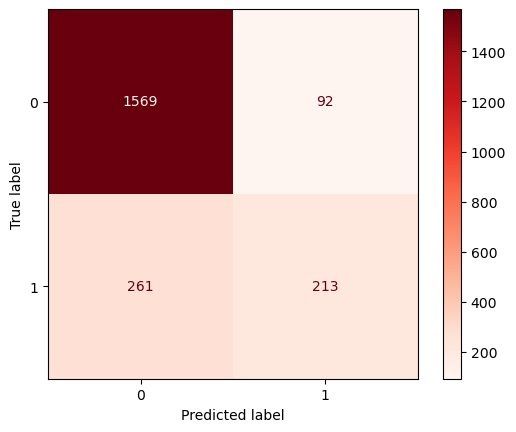

In [52]:
# Check Performance Model against Train-Set

y_pred_train = pipe_svc.predict(X_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_svc, X_train, y_train, cmap='Reds'))

Dari confussion matrix Train Set model SVM default dapat terlihat bahwa: 
- False positive = 92
Ini mengindikasikan jumlah sampel yang seharusnya diprediksi sebagai negatif (tidak akan terjadi default payment next month), tetapi salah prediksi sebagai positif (akan terjadi default payment next month). Dalam konteks keuangan, FP menunjukkan jumlah pelanggan yang seharusnya tidak mengalami default pembayaran tetapi salah diklasifikasikan sebagai berpotensi default. Dalam kasus ini, terdapat 92 kasus pada data train.

- False Negative = 261
Ini menunjukkan jumlah sampel yang seharusnya diprediksi sebagai positif (akan terjadi default payment next month), tetapi salah prediksi sebagai negatif (tidak akan terjadi default payment next month). Dalam konteks keuangan, FN menunjukkan jumlah pelanggan yang seharusnya mengalami default pembayaran tetapi salah diklasifikasikan sebagai tidak akan mengalami default. Dalam kasus ini, terdapat 261 kasus pada data train

Pengetahuan tentang FP dan FN pada data train membantu dalam mengevaluasi kinerja model sebelumnya sebelum diterapkan pada data test. Mengurangi jumlah FP dan FN merupakan tujuan yang diinginkan untuk meningkatkan ketepatan prediksi dan mengelola risiko kredit dengan lebih efektif.

F1 Score - Test Set   :  0.44943820224719105 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       636
           1       0.55      0.38      0.45       158

    accuracy                           0.81       794
   macro avg       0.70      0.65      0.67       794
weighted avg       0.80      0.81      0.80       794
 

Confusion Matrix      : 


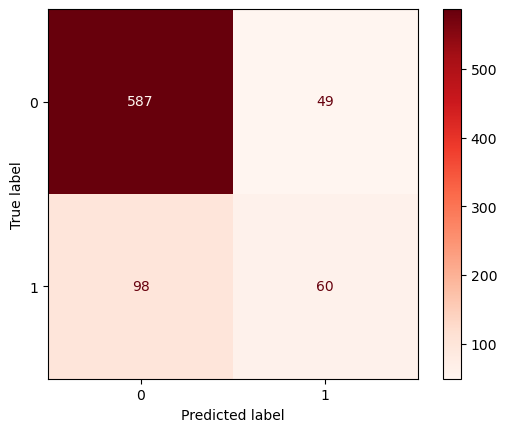

In [53]:
# Check Test-Set

y_pred_test = pipe_svc.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test, cmap='Reds'))

Dari confussion matrix Test Set model SVM default dapat terlihat bahwa: 
- False positive = 49
Ini mengindikasikan jumlah sampel yang seharusnya diprediksi sebagai negatif (tidak akan terjadi default payment next month), tetapi salah prediksi sebagai positif (akan terjadi default payment next month). Dalam konteks keuangan, ini berarti jumlah pelanggan yang seharusnya tidak mengalami default pembayaran tetapi salah diklasifikasikan sebagai berpotensi default. Dalam kasus ini, terdapat 49 kasus.

- False Negative = 98
Ini menunjukkan jumlah sampel yang seharusnya diprediksi sebagai positif (akan terjadi default payment next month), tetapi salah prediksi sebagai negatif (tidak akan terjadi default payment next month). Dalam konteks keuangan, ini berarti jumlah pelanggan yang seharusnya mengalami default pembayaran tetapi salah diklasifikasikan sebagai tidak akan mengalami default. Dalam kasus ini, terdapat 98 kasus.

Dalam konteks keuangan, mengurangi jumlah FP dan FN merupakan hal yang diinginkan untuk meningkatkan ketepatan prediksi dan mengelola risiko kredit dengan lebih efektif.

In [54]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - f1_score,0.449438
train - f1_score,0.546855


Berikut adalah proses model evaluasi dengan menggunakan metrik klasifikasi. Model svm yang dilakukan menggunakan default hyperparameter yang hanya menghasilkan F1 Score pada train sebesar 0,54 dan F1 score pada test sebesar 0,44. Model ini masih terbilang underfit karena score yang dihasilkan cukup rendah. Sehingga perlu dilakukan hyperparameter tuning.

## Hyperparameter Tuning Best Model
> Menggunakan Random Search agar lebih mudah dan cepat

In [55]:
# Parameter untuk pencarian acak
param_distributions = {
    'svc__C': uniform(0.001, 1000),  # Distribusi uniform dari 0.001 hingga 1000 untuk C
    'svc__gamma': uniform(0.001, 1000)  # Distribusi uniform dari 0.001 hingga 1000 untuk gamma
}

# Inisialisasi RandomizedSearchCV
svc_random_search = RandomizedSearchCV(pipe_svc, param_distributions, cv=5, random_state=10)

# Fitting model
svc_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               MinMaxScaler(),
                                                                               ['limit_balance',
                                                                                'pay_amt_1',
                                                                                'pay_amt_2',
                                                                                'pay_amt_3',
                                                                                'pay_amt_4',
                                                                                'pay_amt_5',
                                                                                'pay_amt_6'])])),
                                             ('svc', SVC(random_state=10))]),
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024E03E01310>,
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024E03B9FA90>},
                   random_state=10)

In [56]:
# Output parameter terbaik
print("Best parameters:", svc_random_search.best_params_)

Best parameters: {'svc__C': 685.3608183677973, 'svc__gamma': 953.3943461949365}


Setelah dilakukan random search dan ditrain kembali pada data train, best hyperparameter yang dihasilkan adalah:
- C = 685.3608183677973
- gamma = 953.3943461949365

sehingga akan dilakukan evaluasi menggunakan paramater terbaik dan dibandingkan dengan hasil pada model default.

In [57]:
# Get Best Estimator
svc_random_search_best = svc_random_search.best_estimator_

In [58]:
# print hasil dari pencarian hyperparameter tuning yang dilakukan dengan algoritma SVC menggunakan metode Randomized Search.
print('Best cross-validation accuracy : {:.2f}'.format(svc_random_search.best_score_))
print('Best parameters : ', svc_random_search.best_params_)
print('Test set accuracy : {:.2f}'.format(svc_random_search.score(X_test, y_test)))

Best cross-validation accuracy : 0.77
Best parameters :  {'svc__C': 685.3608183677973, 'svc__gamma': 953.3943461949365}
Test set accuracy : 0.79


F1 Score - Train Set  :  0.9894067796610171 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1661
           1       0.99      0.99      0.99       474

    accuracy                           1.00      2135
   macro avg       0.99      0.99      0.99      2135
weighted avg       1.00      1.00      1.00      2135
 

Confusion Matrix      : 


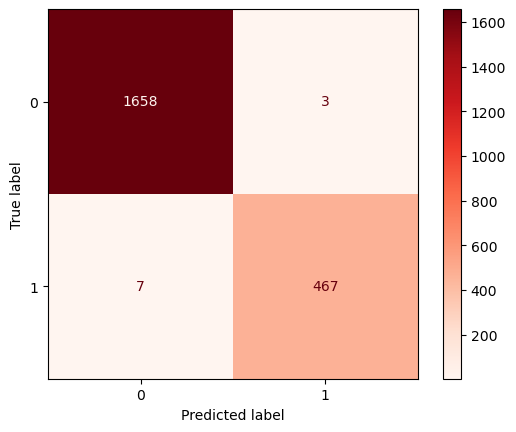

In [59]:
# Check Performance Model against Train-Set setelah tuning

y_pred_train = svc_random_search_best.predict(X_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_random_search_best, X_train, y_train, cmap='Reds'))

Dari confussion matrix Train Set model SVM tuning dapat terlihat bahwa: 
- False positive = 3
Ini mengindikasikan jumlah sampel yang seharusnya diprediksi sebagai negatif (tidak akan terjadi default payment next month), tetapi salah prediksi sebagai positif (akan terjadi default payment next month). Dalam kasus ini, terdapat 3 kasus seperti itu pada data train setelah tuning.

- False Negative = 7
Ini menunjukkan jumlah sampel yang seharusnya diprediksi sebagai positif (akan terjadi default payment next month), tetapi salah prediksi sebagai negatif (tidak akan terjadi default payment next month). Dalam kasus ini, terdapat 7 kasus seperti itu pada data train setelah tuning.

Memperhatikan FP dan FN membantu mengevaluasi kinerja model setelah proses penyetelan parameter. Mengurangi jumlah FP dan FN merupakan tujuan untuk meningkatkan akurasi dan keandalan prediksi model terhadap data train dan uji.

F1 Score - Test Set   :  0.0 

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.99      0.89       636
           1       0.00      0.00      0.00       158

    accuracy                           0.79       794
   macro avg       0.40      0.50      0.44       794
weighted avg       0.64      0.79      0.71       794
 

Confusion Matrix      : 


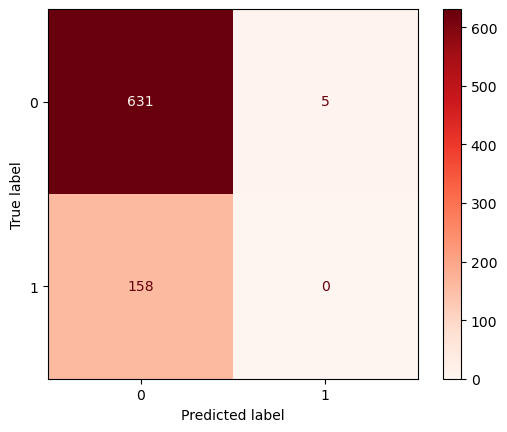

In [60]:
# Check Test-Set setelah tuning

y_pred_test = svc_random_search_best.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_random_search_best, X_test, y_test, cmap='Reds'))

Dalam konteks Confusion Matrix untuk Test Set pada model SVM setelah dilakukan tuning, nilai False Positive (FP) dan False Negative (FN) menggambarkan kinerja model terhadap data test setelah penyetelan hyperparameter dilakukan terlihat bahwa: 
- False positive = 5
    
    Menunjukkan jumlah sampel yang seharusnya diprediksi sebagai negatif (tidak akan terjadi default payment next month), namun salah prediksi sebagai positif (akan terjadi default payment next month). Dalam kasus ini, terdapat 5 sampel seperti itu pada data uji setelah tuning.
- False Negative = 158

    Menunjukkan jumlah sampel yang seharusnya diprediksi sebagai positif (akan terjadi default payment next month), tetapi salah prediksi sebagai negatif (tidak akan terjadi default payment next month). Dalam kasus ini, terdapat 158 sampel seperti itu pada data uji setelah tuning dan ini cukup tinggi sehingga model ini kurang bagus.

Mengamati FP dan FN membantu mengevaluasi performa model setelah tuning. Mengurangi jumlah FP dan FN menjadi tujuan utama untuk meningkatkan akurasi dan keandalan prediksi model terhadap data test.

In [61]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Random Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Random Search
train - f1_score,0.546855,0.989407
test - f1_score,0.449438,0.000000


Ternyata setelah dibandingkan, model yang menggunakan hyperparameter tuning mengalami overfit yang cukup tinggi karena pada data train nilai F1 score sangat tinggi yaitu 0,98 sedangkan nilai F1 score pada data test sangat kecil yaitu 0. Oleh karena itu, saya lebih memilih menggunakan default hyperparameter untuk disaving ke dalam model untuk melakukan model inference dan model deployment.

# x. Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Dengan melihat hasil Model Evaluation, pilihlah satu model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.

In [62]:
# Save file model SVM default as best model
with open('model_SVC.pkl', 'wb') as file_1: 
  pickle.dump(pipe_svc, file_1)

# Save file teks num_col yang terdiri dari kolom-kolom numerik
with open('num_col.txt', 'w') as file_2:
  json.dump(num_col, file_2)

# Save file teks cat_col yang terdiri dari kolom-kolom kategorik
with open('cat_col.txt', 'w') as file_3:
  json.dump(cat_col, file_3)

# xi. Model Inference (different notebook)
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Gunakan model terbaik berdasarkan hasil Model Evaluation.

Terdapat dalam notebook "model_inference.ipynb"

# xii. Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## Kesimpulan Hasil

Kesimpulan Secara Keseluruhan:
- Tujuan utama proyek ini adalah untuk memprediksi kemungkinan default pembayaran bulan berikutnya bagi pemegang kartu kredit dengan menggunakan data yang tersedia.
- Pemodelan dilakukan dengan menggunakan algoritma Support Vector Machine (SVM) dengan hyperparameter default dan tuning untuk dibandingkan.
- Evaluasi model dilakukan menggunakan berbagai metrik klasifikasi, termasuk Confusion Matrix, F1 Score, False Positive, dan False Negative.
- Model yang menggunakan hyperparameter tuning menghasilkan tingkat overfitting yang tinggi, sehingga model dengan hyperparameter default lebih dipilih untuk disimpan dan digunakan untuk inferensi dan deployment.
- Proyek ini bertujuan untuk membantu lembaga keuangan mengidentifikasi risiko kredit dengan lebih akurat, sehingga langkah-langkah pencegahan yang tepat dapat diambil untuk mengurangi dampak default pembayaran, namun model yang saya buat masih underfitting sehingga perlu beberapa perbaikan lebih lanjut.


Kesimpulan Model SVM:

**Kelebihan SVM:**
1. Efektif dalam Ruang Fitur yang Tinggi: SVM efektif dalam menangani data yang memiliki banyak fitur, seperti dalam kasus model kali ini yaitu 14 fitur meskipun tidak lebih banyak dari jumlah baris.

2. Mampu Menangani Dataset yang Relatif Kecil: pada model kali ini dataset memiliki ukuran 378 kb dengan 2135 baris pada train 794 baris pada test.

3. SVM mampu menangani pola dan hubungan antar variabel yang tidak bersifat linear atau tidak dapat dipisahkan secara linear. Pada kasus ini, sudah dilakukan feature selection untuk memilih feature yang sekiranya linear sehingga tidak begitu berpengaruh.

**Keterbatasan SVM:**
1. Jumlah feature yang terlalu banyak menyebabkan overfitting. Pada kasus kali ini, mungkin hal itu dapat terjadi dan perlu disesuaikan kernel agar mengurangi overfitting.
2. Kinerja yang Buruk pada Dataset Besar: SVM dapat menjadi tidak efisien pada dataset yang sangat besar karena kompleksitas waktunya meningkat secara kuadratik dengan jumlah sampel, meskipun hal ini mungkin tidak berlaku dalam kasus saya dengan dataset yang relatif kecil.
3. Memerlukan Pemilihan Kernel yang Sesuai: Pemilihan kernel yang tepat untuk SVM dapat menjadi tantangan, dan pemilihan yang salah dapat mengakibatkan kinerja yang buruk. Dalam kasus saya sepertinya perlu dipertimbangkan menggunakan kernel yang lain.
4. Sensitif terhadap feature scaled dan outliers. Namun, dalam kasus kali ini saya sudah melakukan scaler dan handling outlier.

Dengan memahami kelebihan dan keterbatasan SVM, semoga model dapat dioptimalkan penggunaannya dalam menyelesaikan masalah klasifikasi seperti prediksi default pembayaran bulan berikutnya.

Further Improvement:
1. **Optimasi Kernel**: Melakukan eksperimen dengan berbagai jenis kernel seperti linear, polynomial, dan radial basis function (RBF) untuk menentukan kernel yang paling sesuai dengan struktur data. Hal ini dapat membantu mengatasi masalah overfitting dan meningkatkan kinerja model.

2. **Pemilihan Fitur yang Lebih Optimal**: Lakukan analisis lebih lanjut terhadap fitur-fitur yang digunakan dalam model. Kemungkinan terdapat fitur-fitur yang tidak memberikan kontribusi signifikan terhadap prediksi default pembayaran bulan berikutnya. Pemilihan fitur yang lebih optimal dapat membantu mengurangi kompleksitas model.

4. **Tuning Parameter**: Melakukan tuning parameter secara lebih mendalam dengan menggunakan teknik seperti grid search untuk menemukan kombinasi parameter yang optimal. Hal ini dapat membantu meningkatkan performa dan kestabilan model.

6. **Evaluasi Performa dengan Metrik yang Lebih Lengkap**: Selain metrik yang sudah dijalankan, pertimbangkan juga penggunaan metrik lain seperti accuracy, recall, precision, ROC-AUC untuk mengevaluasi performa model secara menyeluruh.

Dengan menerapkan langkah-langkah tersebut, diharapkan model SVM dapat ditingkatkan performanya dan menjadi lebih handal dalam memprediksi default pembayaran bulan berikutnya.


Business Insight:
1. Outlier pada Fitur Keuangan: Adanya outlier pada fitur seperti bill_amt dan pay_amt menunjukkan adanya kecenderungan pelanggan dengan kebiasaan pengeluaran atau pembayaran yang ekstrim. Perlu dilakukan analisis lebih lanjut untuk memahami pola dan perilaku keuangan pelanggan ini, serta mengidentifikasi apakah outlier tersebut memiliki dampak signifikan terhadap pembayaran bulanan mereka.

2. Proporsi Default dan Non-Default Payment: Proporsi jumlah pelanggan yang mengalami default payment dan non-default payment memberikan gambaran tentang kesehatan keuangan dan risiko kredit yang dihadapi perusahaan. Analisis lebih lanjut dapat membantu dalam mengevaluasi strategi manajemen risiko dan kebijakan kredit yang ada.

3. Profil Pelanggan Berdasarkan Limit Balance: Pelanggan dengan limit balance di bawah $100,000 memiliki frekuensi yang signifikan. Memahami preferensi dan perilaku pembayaran dari segmen ini dapat membantu perusahaan dalam menyesuaikan penawaran produk dan layanan serta strategi pemasaran.

4. Distribusi Usia Pelanggan: Analisis distribusi usia pelanggan dapat memberikan wawasan tentang segmentasi demografis dan preferensi konsumen. Mengetahui preferensi pembayaran dan kecenderungan kredit dari setiap kelompok usia dapat membantu dalam mengembangkan strategi pemasaran yang lebih terfokus dan efektif.

5. Pendidikan dan Default Payment: Tingkat pendidikan dapat menjadi indikator potensial dalam memprediksi default payment. Pelanggan dengan tingkat pendidikan universitas memiliki proporsi default payment yang signifikan, memberikan peluang untuk mengeksplorasi lebih lanjut faktor-faktor yang memengaruhi kemampuan pembayaran mereka.

6. Status Pernikahan dan Default Payment: Perbedaan dalam frekuensi default payment antara pelanggan yang berstatus single dan marriage menunjukkan adanya perbedaan dalam tingkat kewajiban keuangan dan tanggung jawab pembayaran. Hal ini dapat menjadi pertimbangan dalam pengembangan strategi manajemen risiko dan penilaian kredit.

7. Perbedaan Gender dalam Default Payment: Terdapat perbedaan dalam frekuensi default payment antara pelanggan pria dan wanita. Analisis lebih lanjut tentang faktor-faktor yang mungkin memengaruhi perilaku pembayaran antara kedua jenis kelamin dapat membantu dalam personalisasi layanan dan dukungan pelanggan.

8. Hubungan Antara Usia dan Credit Limit: Scatterplot antara usia dan credit limit menunjukkan adanya hubungan yang menarik antara kedua variabel tersebut. Analisis lebih lanjut dapat dilakukan untuk memahami pola ini dan mengidentifikasi peluang untuk menyesuaikan batas kredit berdasarkan faktor-faktor demografis.

Dengan memahami temuan ini, lembaga keuangan dapat mengambil langkah-langkah strategis dalam meningkatkan pengelolaan risiko kredit, mengoptimalkan penawaran produk dan layanan, serta meningkatkan pengalaman pelanggan secara keseluruhan.

## Jawaban Conceptual Problems

### 1. Apakah yang dimaksud dengan coeficient pada logistic regression?

Dalam konteks regulasi logistik, koefisien dinamakan juga parameter estimasi. Koefisien menunjukkan pengaruh variasi independen terhadap persamaan logit, yang merupakan fungsi yang digunakan untuk memodelkan persamaan antara variabel independen dan variabel dependen biner. Selain koefisien, regulasi logistik juga memperlihatkan nilai odd ratio, yang merupakan rasio antara kemungkinan kejadian dan kemungkinan gagal. 
Source:
- https://aws.amazon.com/id/what-is/logistic-regression/
- https://agungbudisantoso.com/arti-koefisien-dan-odds-ratio-pada-regresi-logistik/

### 2. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

Parameter kernel pada SVM adalah mengubah data masukan menjadi ruang fitur berdimensi lebih tinggi. Transformasi ini memudahkan untuk menemukan pemisahan linier atau mengklasifikasikan kumpulan data dengan lebih efektif. Untuk melakukan hal ini, SVM menggunakan fungsi kernel. Salah satu kernel yang saya pahami adalah kernel yang umum digunakan yaitu RBF. 
- Kernel RBF juga merupakan kernel default, dimana apabila hyperparameter tidak diatur, maka kernal RBF yang akan digunakan.
- Kernel RBF adalah algoritma yang bagus di data yang tidak terlalu berat serta dapat digunakan pada data linear. 
- Kernel ini dapat dilakukan ketika tidak mengetahui distribusi data.
- Menggunakan kernel RBF ketika kelas tidak dapat dipisahkan secara linier dan mungkin memiliki kompleksitas yang kompleks atau batasan keputusan nonlinier.
- Digunakan untuk kasus di mana mengharapkan data memiliki kepadatan yang bervariasi atau ketika mungkin terdapat outlier

### 3. Bagaimana cara memilih K yang optimal pada KNN ?

- Tentukan rentang nilai K yang akan dievaluasi. Rentang ini dapat berupa nilai tunggal atau ganjil agar tidak sama rata dan dapat ditentukan.
- Buat Model KNN: Latih model KNN untuk setiap nilai K dalam rentang yang telah ditentukan.
- Lakukan c ross validation untuk mengevaluasi performa model KNN untuk setiap nilai K. Dalam validasi silang, data dibagi menjadi beberapa lipatan, dan model dievaluasi menggunakan satu lipatan sebagai data test dan yang lainnya sebagai data train. Prosedur ini diulangi beberapa kali dengan lipatan yang berbeda, dan performa rata-rata dari semua lipatan digunakan sebagai metrik evaluasi.
- Pilih nilai K yang memberikan performa terbaik berdasarkan metrik evaluasi yang dipilih. Metrik evaluasi yang umum digunakan untuk KNN termasuk akurasi, presisi, recall, F1 score, atau area di bawah kurva ROC (AUC-ROC), tergantung pada jenis masalah klasifikasi yang dihadapi.
- Setelah memilih nilai K yang optimal, evaluasi model KNN lengkap dilakukan menggunakan data uji terpisah untuk mengkonfirmasi performa model secara independen.

Dengan menggunakan cara tersebut, diharapkan dapat menentukan nilai K yang memberikan hasil terbaik untuk dataset. Pemilihan nilai K yang optimal mungkin bergantung pada karakteristik unik dari dataset dan masalah klasifikasi yang dihadapi.

### 4. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

**Accuracy**:
- Memprediksi antara label yg terprediksi benar (TP & TN) dari keseluruhan data (TP, TN, FP, FN)
- Akurasi akan menjadi tidak relevan ketika kelas target imbalance.
- Sehingga cocok digunakan hanya pada saat terdapat keseimbangan antara kelas dalam dataset.
- Maksud dari balance adalah semisal ketika dalam konteks klasifikasi, kelas atau label target dapat memiliki distribusi yang seimbang ketika jumlah sampel positif dan negatifnya sekitar proporsional atau mendekati proporsional.

**Precision**:
- Merupakan rasio prediksi positif yang benar terhadap total prediksi positif.
- Mengukur seberapa banyak dari semua hasil yang diberi label positif adalah benar.
- Cocok digunakan ketika fokus pada mengurangi hasil false negative.

**Recall**:
- Merupakan rasio prediksi positif yang benar terhadap total data aktual yang positif.
- Mengukur seberapa banyak dari semua kasus positif telah diidentifikasi.
- Cocok digunakan ketika fokus pada mengurangi hasil false positive.

**F1 Score**:
- Merupakan gabungan mean dari precision dan recall.
- Menggabungkan precision dan recall menjadi satu metrik tunggal.
- Cocok digunakan ketika ingin mencapai keseimbangan antara precision dan recall.